### Dealing with Missing value

In [2]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


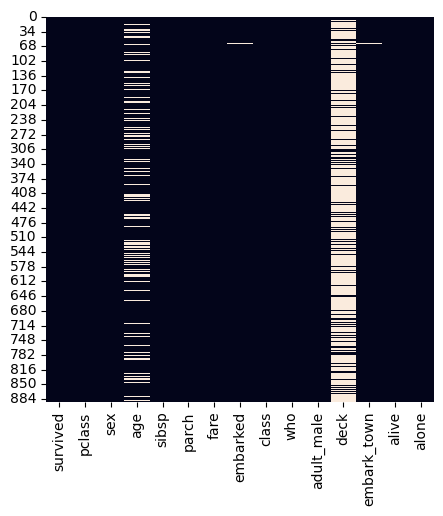

In [5]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [6]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [17]:
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

### Amader detaset e "Deck" column e 77% missing data. tai amra ai column ke drop korbo. Sadaronoto Machine learning e amra 20% beshi missig hole amra oi column ke drop kori.

In [7]:
df.drop(columns='deck',inplace=True)

In [14]:
round((df.isnull().sum().sort_values(ascending=False)/len(df))*100,2)

age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

### Akhon amara age column er missing value handel korbo. jehetu age column ar missing value less than 20%. tai amra ai column ke drop korbo na.(jodi amon column thke jekhane missing value 20%+ but amar analysis korar jonno ai column importen tokhono o amra drop korbo na)

#### Missing value handel korar jonno amra nicher step gulo follow korbo.

1. Replace by mean(Numarical value)
2. replace by meadin(Numarical value deta y outlier thakle(Beshir vag somoy))
3. replace by mode(Catagorical value)

Ai gulo charao aro onek technique ase jegulo amra ektu pore dekchi.

<Axes: >

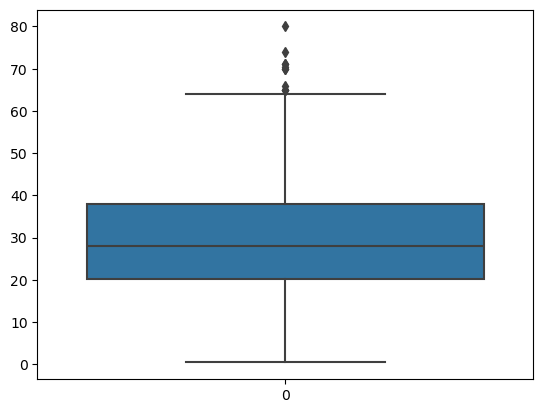

In [17]:
sns.boxplot(data=df['age'])

Jehetu amar data y outlier ase tai ami mean diye replace na kore meadian dye replace korbo.

In [21]:

df['age'] = df['age'].fillna(df['age'].median())

In [22]:
round((df.isnull().sum().sort_values(ascending=False)/len(df))*100,2)

embarked       0.22
embark_town    0.22
survived       0.00
pclass         0.00
sex            0.00
age            0.00
sibsp          0.00
parch          0.00
fare           0.00
class          0.00
who            0.00
adult_male     0.00
alive          0.00
alone          0.00
dtype: float64

Akhon Amar `age` column e kono missing value nai. 

embarked   
embark_town

column 2 tay missing value ase akhon amra ai 2 column er missing value handel korbo. 

Jehetu column 2 tai catgorical tai column 2 tokei mode diye replace korbo

In [24]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [26]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [27]:
round((df.isnull().sum().sort_values(ascending=False)/len(df))*100,2)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

Amader puro dataset e akhon kono missing value nei.

Amare Sickit-learn use koreo data preprocessing (missing value handelling, outliear remove and so on... korte pari.)

Akhon Amra sickit learn use kore missing value handel korbo. Amra 2 ta technique dekbo.
1. Univariate Imputation
2. Multivariate Imputation

১. ইউনিভেরিয়েট ইমপিউটেশন (Univariate Imputation)
ইউনিভেরিয়েট ইমপিউটেশন হলো এমন একটি পদ্ধতি যেখানে একটি ভেরিয়েবলের (কলাম) মিসিং ভ্যালু পূরণ করার জন্য শুধুমাত্র সেই ভেরিয়েবলেরই বিদ্যমান ডেটা ব্যবহার করা হয়। এটি অন্য কোনো ভেরিয়েবলের সাথে সম্পর্ক বিবেচনা করে না।

উদাহরণ:

Mean Imputation (গড় দিয়ে পূরণ): মিসিং ভ্যালুগুলোকে সেই কলামের গড় মান দিয়ে পূরণ করা।
Median Imputation (মধ্যমা দিয়ে পূরণ): মিসিং ভ্যালুগুলোকে সেই কলামের মধ্যমা মান দিয়ে পূরণ করা।
Mode Imputation (মোড বা বহুল প্রচলিত মান দিয়ে পূরণ): ক্যাটাগরিক্যাল ডেটার ক্ষেত্রে মিসিং ভ্যালুগুলোকে সেই কলামের সর্বাধিক প্রচলিত মান দিয়ে পূরণ করা।
Constant Imputation (স্থির মান দিয়ে পূরণ): সব মিসিং ভ্যালু একটি নির্দিষ্ট স্থির মান দিয়ে পূরণ করা।
Forward Fill (ffill) / Backward Fill (bfill): টাইম সিরিজ ডেটার ক্ষেত্রে পূর্ববর্তী বা পরবর্তী উপলব্ধ মান দিয়ে পূরণ করা।


সুবিধাসমূহ (Advantages):

সহজ এবং দ্রুত: এটি বাস্তবায়ন করা খুবই সহজ এবং দ্রুত ডেটা পূরণ করতে পারে।
কম্পিউটেশনালি সস্তা: এর জন্য খুব বেশি কম্পিউটেশনাল ক্ষমতার প্রয়োজন হয় না।
ব্যাখ্যা করা সহজ: এই পদ্ধতির ফলাফল সহজে বোঝা যায়।


অসুবিধাসমূহ (Disadvantages):

ডেটার ভ্যারিয়েন্স কমিয়ে দেয়: Mean বা Median Imputation ডেটার ভ্যারিয়েন্স (variance) কমিয়ে দেয়, যা মডেলের পারফরম্যান্সে প্রভাব ফেলতে পারে।
অন্যান্য ভেরিয়েবলের সাথে সম্পর্ক উপেক্ষা করে: এটি ডেটার অন্যান্য ভেরিয়েবলগুলোর মধ্যেকার সম্পর্ক বিবেচনা করে না, ফলে ডেটার আসল বিতরণে (distribution) বিকৃতি ঘটাতে পারে।
আউটলায়ার (Outliers) তৈরি করতে পারে: কিছু ক্ষেত্রে, বিশেষ করে যদি মিসিং ডেটার পরিমাণ বেশি হয়, তাহলে এটি ডেটাসেটে কৃত্রিম আউটলায়ার তৈরি করতে পারে বা বিদ্যমান আউটলায়ারগুলোকে আরও প্রকট করতে পারে।
অযথাযথ পূর্বাভাস: যেহেতু এটি ডেটার আন্তঃসম্পর্ককে উপেক্ষা করে, তাই এটি মডেলের পূর্বাভাসকে (predictions) প্রভাবিত করতে পারে এবং পক্ষপাতিত্ব (bias) তৈরি করতে পারে।

 মাল্টিভেরিয়েট ইমপিউটেশন (Multivariate Imputation)
মাল্টিভেরিয়েট ইমপিউটেশন হলো এমন একটি পদ্ধতি যেখানে একটি ভেরিয়েবলের মিসিং ভ্যালু পূরণ করার জন্য অন্যান্য ভেরিয়েবলের সাথে বিদ্যমান সম্পর্ক ব্যবহার করা হয়। এটি একটি ভেরিয়েবলের মিসিং ডেটা অনুমান করার জন্য অন্যান্য ভেরিয়েবলের তথ্য ব্যবহার করে একটি মডেল তৈরি করে।

উদাহরণ:

K-Nearest Neighbors (KNN) Imputation: মিসিং ভ্যালুগুলোকে নিকটতম 'K' সংখ্যক ডেটা পয়েন্টের (neighbor) মানের গড় বা মোড দিয়ে পূরণ করা হয়। এই 'neighbor' গুলো অন্যান্য ভেরিয়েবলের উপর ভিত্তি করে নির্ধারিত হয়।
Regression Imputation: একটি ভেরিয়েবলের মিসিং ভ্যালু পূরণ করার জন্য একটি রিগ্রেশন মডেল ব্যবহার করা হয়, যেখানে অন্যান্য ভেরিয়েবলগুলো ইন্ডিপেন্ডেন্ট ভেরিয়েবল (independent variables) হিসেবে কাজ করে।
Iterative Imputation (MICE - Multiple Imputation by Chained Equations): এটি একটি উন্নত পদ্ধতি যেখানে একাধিক রাউন্ডে মিসিং ভ্যালু পূরণ করা হয়। প্রতিটি ভেরিয়েবলের মিসিং ভ্যালু পূরণ করার জন্য অন্যান্য ভেরিয়েবলগুলোকে predictor হিসেবে ব্যবহার করে একটি মডেল তৈরি করা হয়। এই প্রক্রিয়াটি যতক্ষণ না অভিসারী হয় (converges) ততক্ষণ পুনরাবৃত্তি হয়। এটি একাধিক সম্পূর্ণ ডেটাসেট তৈরি করে, যা ইমপিউটেশনের অনিশ্চয়তাকে (uncertainty) বিবেচনা করে।


সুবিধাসমূহ (Advantages):

উচ্চতর নির্ভুলতা: এটি ডেটার মধ্যকার সম্পর্ক ব্যবহার করে, তাই ইউনিভেরিয়েট পদ্ধতির চেয়ে আরও নির্ভুল এবং বাস্তবসম্মত মান অনুমান করতে পারে।
ডেটার ভ্যারিয়েন্স বজায় রাখে: এটি ডেটার প্রকৃত ভ্যারিয়েন্স এবং কোভারিয়েন্স (covariance) সম্পর্ককে আরও ভালোভাবে ধরে রাখে।
কম পক্ষপাতিত্ব (Bias): যেহেতু এটি ডেটার জটিল সম্পর্কগুলোকে বিবেচনা করে, তাই এটি মডেলের পূর্বাভাসে পক্ষপাতিত্ব কমিয়ে আনতে পারে।
আরো শক্তিশালী মডেল: মাল্টিভেরিয়েট ইমপিউটেশনের মাধ্যমে প্রাপ্ত ডেটাসেট ব্যবহার করে তৈরি মডেলগুলো সাধারণত বেশি শক্তিশালী হয়।


অসুবিধাসমূহ (Disadvantages):

কম্পিউটেশনালি ব্যয়বহুল: ইউনিভেরিয়েট ইমপিউটেশনের চেয়ে এটি অনেক বেশি কম্পিউটেশনাল ক্ষমতা এবং সময় নেয়, বিশেষ করে বড় ডেটাসেটের জন্য।
বাস্তবায়ন করা জটিল: এটি বাস্তবায়ন করা অপেক্ষাকৃত কঠিন এবং উন্নত পরিসংখ্যানগত জ্ঞানের প্রয়োজন হয়।
ওভারফিটিংয়ের ঝুঁকি: যদি ডেটাসেটে খুব বেশি মিসিং ডেটা থাকে এবং ভেরিয়েবলগুলোর মধ্যে সম্পর্ক দুর্বল হয়, তাহলে এটি ওভারফিটিং (overfitting) এর ঝুঁকি বাড়িয়ে দিতে পারে।
মডেলের নির্ভরতা: ইমপিউটেশন মডেলের গুণগত মানের উপর নির্ভরশীল, তাই ভুল মডেল নির্বাচন করলে খারাপ ফলাফল আসতে পারে।
কখন কোনটি ব্যবহার করবেন:

যদি আপনার ডেটাসেটে খুব কম মিসিং ডেটা থাকে এবং ভেরিয়েবলগুলোর মধ্যে পারস্পরিক সম্পর্ক খুব বেশি গুরুত্বপূর্ণ না হয়, তাহলে ইউনিভেরিয়েট ইমপিউটেশন একটি সহজ এবং দ্রুত সমাধান হতে পারে।
যদি আপনার ডেটাসেটে উল্লেখযোগ্য পরিমাণ মিসিং ডেটা থাকে এবং ভেরিয়েবলগুলোর মধ্যে শক্তিশালী সম্পর্ক বিদ্যমান থাকে, তাহলে মাল্টিভেরিয়েট ইমপিউটেশন ব্যবহার করা উচিত। এটি আপনার মডেলের নির্ভুলতা এবং নির্ভরযোগ্যতা উন্নত করতে সাহায্য করবে।

Univariate Imputation korarar jonno same dataset use korbo.

In [28]:
data=sns.load_dataset('titanic')

In [29]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
data.drop(columns='deck',inplace=True)

In [35]:
round((data.isnull().sum().sort_values(ascending=False)/len(data))*100,2)

age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
data['age']=imp.fit_transform(data['age'].values.reshape(-1, 1))
imp=SimpleImputer(strategy='most_frequent')
data[['embarked']]=imp.fit_transform(data[['embarked']])


In [40]:
round((data.isnull().sum().sort_values(ascending=False)/len(data))*100,2)

embarked       0.22
embark_town    0.22
survived       0.00
pclass         0.00
sex            0.00
age            0.00
sibsp          0.00
parch          0.00
fare           0.00
class          0.00
who            0.00
adult_male     0.00
alive          0.00
alone          0.00
dtype: float64

In [47]:
imp=SimpleImputer(strategy='most_frequent')
data[['embarked']]=imp.fit_transform(data[['embarked']])

In [46]:
imp=SimpleImputer(strategy='most_frequent')
data[['embark_town']]=imp.fit_transform(data[['embark_town']])


In [48]:
round((data.isnull().sum().sort_values(ascending=False)/len(data))*100,2)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

Akhon Ar kono missing value nei.

Ai bar amra ar che ye o aro karjokori akta method shikbo ar seta holo multivarient

In [52]:
df1=sns.load_dataset('titanic')

In [53]:
round((df1.isnull().sum().sort_values(ascending=False)/len(df1))*100,2)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
df['age'] = imp.fit_transform(df[['age']])  



In [62]:
# df['embark_town'] = imp.fit_transform(df[['embark_town']]) 
# df['embarked'] = imp.fit_transform(df[['embarked']])

IterativeImpute shudu numaric column er upor applicable hobe.Catagorical column like embark_town ar jonno amder simpleimpute use korte hobe. Ar jodi use kortei hoy tahole feature encoding korte hobe

In [60]:
from sklearn.impute import SimpleImputer

# Use IterativeImputer for numeric columns only
numeric_cols = ['age', 'fare', 'sibsp', 'parch']
df[numeric_cols] = imp.fit_transform(df[numeric_cols])

# For categorical columns, use SimpleImputer
cat_imp = SimpleImputer(strategy='most_frequent')
df[['embarked', 'embark_town']] = cat_imp.fit_transform(df[['embarked', 'embark_town']])

In [61]:
# Check for missing values again
print(df.isnull().sum().sort_values(ascending=False))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
